In [1]:
# Import essential libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import math as math
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
%matplotlib inline
sb.set()
plt.style.use('fivethirtyeight') 

## Logistic Regression

In [2]:
games = pd.read_csv('games-prediction-resampling.csv', index_col= 0)
games.head()

,recommend,original_price,discount_price,discount_percentage,mature_content,genre_Action,genre_Adventure,genre_Casual,genre_Massively Multiplayer,genre_RPG,genre_Racing,genre_Simulation,genre_Sports,genre_Strategy,K_cluster_0,K_cluster_1,K_cluster_2,K_cluster_3,K_cluster_4
0,True,19.99,14.99,25.012506,False,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1,False,29.99,29.99,0.000000,True,1,1,0,1,0,0,0,0,0,0,0,1,0,0
2,True,39.99,39.99,0.000000,False,1,1,0,0,0,0,0,0,1,0,0,1,0,0
3,False,44.99,44.99,0.000000,False,1,1,0,1,0,0,0,0,0,0,0,1,0,0
4,True,0.00,0.00,0.000000,False,1,0,0,1,1,0,0,0,1,0,0,1,0,0


In [3]:
# Extract Response and Predictors
X = games.drop(['recommend'], axis = 1) 
y = games['recommend']

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# Create the Logistic Regression object
LogisticR= LogisticRegression(max_iter=1000)      # set the maximum depth of each tree

# Fit Logistic Regression on Train Data
LogisticR.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

Train Data
Accuracy  :	 0.6701499877059257
Precision :	 0.6752713794016415
Recall    :	 0.9568561245544925
F1 Score  :	 0.7917733798991075

TPR Train :	 0.9568561245544925
TNR Train :	 0.1248662147698894

FPR Train :	 0.8751337852301107
FNR Train :	 0.04314387544550741


<AxesSubplot:>

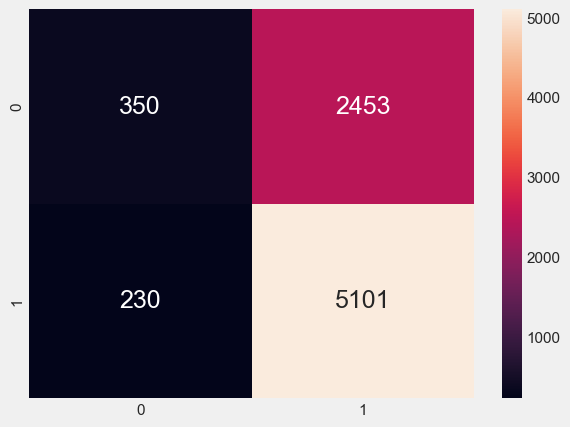

In [4]:
# Predict the Response corresponding to Predictors
y_train_pred = LogisticR.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", LogisticR.score(X_train, y_train))

# Calculate precision, recall, and F1 score
precision = precision_score(y_train, y_train_pred)
recall = recall_score(y_train, y_train_pred)
f1 = f1_score(y_train, y_train_pred)

print("Precision :\t", precision)
print("Recall    :\t", recall)
print("F1 Score  :\t", f1)
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), annot = True, fmt=".0f", annot_kws={"size": 18}) 

Test Data
Accuracy  :	 0.646873207114171
Precision :	 0.6752713794016415
Recall    :	 0.9568561245544925
F1 Score  :	 0.7917733798991075

TPR Test :	 0.953582694907616
TNR Test :	 0.10970797158642462

FPR Test :	 0.8902920284135754
FNR Test :	 0.046417305092383954


<AxesSubplot:>

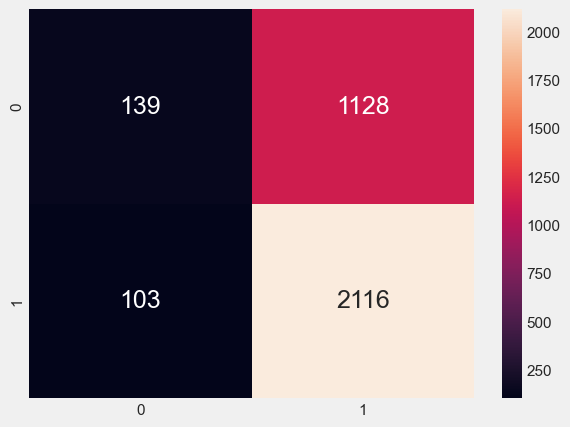

In [5]:
# Predict the Response corresponding to Predictors
y_test_pred = LogisticR.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", LogisticR.score(X_test, y_test))

# Calculate precision, recall, and F1 score
precision = precision_score(y_train, y_train_pred)
recall = recall_score(y_train, y_train_pred)
f1 = f1_score(y_train, y_train_pred)

print("Precision :\t", precision)
print("Recall    :\t", recall)
print("F1 Score  :\t", f1)
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

table = {'Accuracy': LogisticR.score(X_test, y_test), 'precision' : precision, 'recall': recall, 'f1_score' : f1_score}

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

# Logistic Regression - Oversampling

In [6]:
games = pd.read_csv('games-prediction-over-resampling.csv', index_col= 0)
games.head()

,original_price,discount_price,discount_percentage,mature_content,genre_Action,genre_Adventure,genre_Casual,genre_Massively Multiplayer,genre_RPG,genre_Racing,genre_Simulation,genre_Sports,genre_Strategy,K_cluster_0,K_cluster_1,K_cluster_2,K_cluster_3,K_cluster_4,recommend
0,19.99,14.99,25.012506,False,1,0,0,0,0,0,0,0,0,0,0,1,0,0,True
1,29.99,29.99,0.000000,True,1,1,0,1,0,0,0,0,0,0,0,0,0,1,False
2,39.99,39.99,0.000000,False,1,1,0,0,0,0,0,0,1,0,0,0,0,1,True
3,44.99,44.99,0.000000,False,1,1,0,1,0,0,0,0,0,0,0,0,0,1,False
4,0.00,0.00,0.000000,False,1,0,0,1,1,0,0,0,1,0,0,0,0,1,True


In [7]:
# Extract Response and Predictors
X = games.drop(['recommend'], axis = 1) 
y = games['recommend']

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# Create the Logistic Regression object
LogisticR= LogisticRegression(max_iter=1000)      # set the maximum depth of each tree

# Fit Logistic Regression on Train Data
LogisticR.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [8]:
# Predict the Response corresponding to Predictors
y_train_pred = LogisticR.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", LogisticR.score(X_train, y_train))

# Calculate precision, recall, and F1 score
precision = precision_score(y_train, y_train_pred)
recall = recall_score(y_train, y_train_pred)
f1 = f1_score(y_train, y_train_pred)

print("Precision :\t", precision)
print("Recall    :\t", recall)
print("F1 Score  :\t", f1)
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix

Train Data
Accuracy  :	 0.597918637653737
Precision :	 0.6007416563658838
Recall    :	 0.826530612244898
F1 Score  :	 0.6957766642806013

TPR Train :	 0.826530612244898
TNR Train :	 0.31130063965884863

FPR Train :	 0.6886993603411514
FNR Train :	 0.17346938775510204


Test Data
Accuracy  :	 0.5945548197203826
Precision :	 0.6007416563658838
Recall    :	 0.826530612244898
F1 Score  :	 0.6957766642806013

TPR Test :	 0.8224092116917626
TNR Test :	 0.3117097306212204

FPR Test :	 0.6882902693787796
FNR Test :	 0.17759078830823738


<AxesSubplot:>

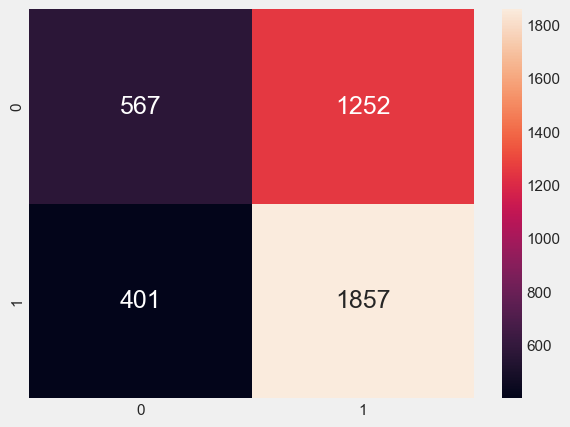

In [9]:
# Predict the Response corresponding to Predictors
y_test_pred = LogisticR.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", LogisticR.score(X_test, y_test))

# Calculate precision, recall, and F1 score
precision = precision_score(y_train, y_train_pred)
recall = recall_score(y_train, y_train_pred)
f1 = f1_score(y_train, y_train_pred)

print("Precision :\t", precision)
print("Recall    :\t", recall)
print("F1 Score  :\t", f1)
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))


# Adding values to the table
newrow = {'Accuracy': LogisticR.score(X_test, y_test), 'precision' : precision, 'recall': recall, 'f1_score' : f1_score}
# Adding the new row to the table
table.update(newrow)

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

# Logistic Regression - Balanced Resampled

In [10]:
games = pd.read_csv('games-prediction-balanced-resampling.csv', index_col= 0)
games.head()

,recommend,original_price,discount_price,discount_percentage,mature_content,genre_Action,genre_Adventure,genre_Casual,genre_Massively Multiplayer,genre_RPG,genre_Racing,genre_Simulation,genre_Sports,genre_Strategy,K_cluster_0,K_cluster_1,K_cluster_2,K_cluster_3,K_cluster_4
0,True,19.99,14.99,25.012506,False,1,0,0,0,0,0,0,0,0,0,0,1,0,0
2,True,39.99,39.99,0.000000,False,1,1,0,0,0,0,0,0,1,0,0,0,0,1
4,True,0.00,0.00,0.000000,False,1,0,0,1,1,0,0,0,1,0,0,0,0,1
8,True,29.99,29.99,0.000000,False,0,0,0,0,0,0,0,0,1,0,0,0,0,1
10,True,19.99,19.99,0.000000,False,0,1,0,0,1,0,0,0,1,0,0,0,0,1


In [11]:
# Extract Response and Predictors
X = games.drop(['recommend'], axis = 1) 
y = games['recommend']

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# Create the Logistic Regression object
LogisticR= LogisticRegression(max_iter=1000)      # set the maximum depth of each tree

# Fit Logistic Regression on Train Data
LogisticR.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [12]:
# Predict the Response corresponding to Predictors
y_train_pred = LogisticR.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", LogisticR.score(X_train, y_train))

# Calculate precision, recall, and F1 score
precision = precision_score(y_train, y_train_pred)
recall = recall_score(y_train, y_train_pred)
f1 = f1_score(y_train, y_train_pred)

print("Precision :\t", precision)
print("Recall    :\t", recall)
print("F1 Score  :\t", f1)
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix

Train Data
Accuracy  :	 0.592147587511826
Precision :	 0.5969997972836002
Recall    :	 0.5590356871678056
F1 Score  :	 0.5773943731006764

TPR Train :	 0.5590356871678056
TNR Train :	 0.6250471520181063

FPR Train :	 0.3749528479818936
FNR Train :	 0.4409643128321944


Test Data
Accuracy  :	 0.5876379690949227
Precision :	 0.5969997972836002
Recall    :	 0.5590356871678056
F1 Score  :	 0.5773943731006764

TPR Test :	 0.5547765118317266
TNR Test :	 0.6209964412811388

FPR Test :	 0.3790035587188612
FNR Test :	 0.44522348816827345


<AxesSubplot:>

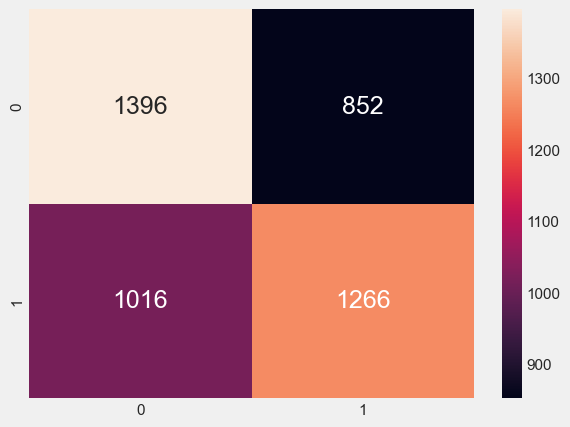

In [13]:
# Predict the Response corresponding to Predictors
y_test_pred = LogisticR.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", LogisticR.score(X_test, y_test))

# Calculate precision, recall, and F1 score
precision = precision_score(y_train, y_train_pred)
recall = recall_score(y_train, y_train_pred)
f1 = f1_score(y_train, y_train_pred)

print("Precision :\t", precision)
print("Recall    :\t", recall)
print("F1 Score  :\t", f1)
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Adding values to the table
newrow = {'Accuracy': LogisticR.score(X_test, y_test), 'precision' : precision, 'recall': recall, 'f1_score' : f1_score}
# Adding the new row to the table
table.update(newrow)

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

In [14]:
table

{'Accuracy': 0.5876379690949227,
 'precision': 0.5969997972836002,
 'recall': 0.5590356871678056,
 'f1_score': <function sklearn.metrics._classification.f1_score(y_true, y_pred, *, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')>}